# Neural network implement of Logistic regression
In the previous sections, we use gradient descent to run the Logistic regression model. We mentioned some important concepts, like epochs, mini-batch, etc.. But we didn't implement them. In fact `sklearn` doesn't provide a very good tool to do all these computations. Hence we turn to another package for this model. We are going to use `keras` to build a Logistic regression model, and plot the "loss vs epochs" learning curves.

`keras` is high level Neural network library built upon `tensorflow`. We will talk about Neural network next Chapter. The package is installed along with `tensorflow`. You may follow the [instructions](https://www.tensorflow.org/install) to install it.

To use `keras` to implement logistic regression, we need the following modules: a `Sequential` model, a `Dense` layer. The model is organized as follows.

We still use the horse colic dataset as an example.

In [121]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Note that we need to perform normalization before throwing the data into the model. Here we use the `MinMaxScaler()` from `sklearn` package. The normalization layer in keras is a little bit more complicated and doesn't fit into situation.

In [122]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In the following code, we first set up the model, and then add one `Dense` layer. This `Dense` layer means that we would perform a linear transformation to the input, by the formula $\theta_0+\theta_1x_1+\theta_2x_2+\ldots+\theta_nx_n$. Then there are three arguments:

- `1`: means that there is only output.
- `activation='sigmoid'`: means that we will apply the `sigmoid` function after the linear transformation.
- `input_dim`: means the dimension of the input. Note that this dimension is the dimension of one individual data point. You don't take the size of the training set into consideration.

After building the basic architectal of the model, we need to speicify a few more arguments. In the `model.compile()` step, we have to input the `optimizer`, the loss function (which is the `binary_crossentropy` in our case) and the metrics to test the performance of the model (which is accuracy in our case).

The `optimizer` is how the parameters are updated. The best choice in general is `adam`. The default setting is `RMSprop` and the optimizer discussed in our lecture is `sgd`. We will use `adam` here, since the learning curve it produces looks better (for illustration).

Finally we could train the model. The argument is straightforward.

In [123]:
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))


Epoch 1/400
9/9 [==============================] - 0s 21ms/step - loss: 0.7554 - accuracy: 0.4627 - val_loss: 0.7540 - val_accuracy: 0.4889
Epoch 2/400
9/9 [==============================] - 0s 4ms/step - loss: 0.7382 - accuracy: 0.4627 - val_loss: 0.7346 - val_accuracy: 0.5111
Epoch 3/400
9/9 [==============================] - 0s 4ms/step - loss: 0.7236 - accuracy: 0.4980 - val_loss: 0.7172 - val_accuracy: 0.5111
Epoch 4/400
9/9 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.5255 - val_loss: 0.7025 - val_accuracy: 0.5111
Epoch 5/400
9/9 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.5529 - val_loss: 0.6896 - val_accuracy: 0.4667
Epoch 6/400
9/9 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5608 - val_loss: 0.6781 - val_accuracy: 0.5333
Epoch 7/400
9/9 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5686 - val_loss: 0.6695 - val_accuracy: 0.5333
Epoch 8/400
9/9 [=========

Note that we assign the output of `model.fit()` to a variable `hist`. The infomation about this training process is recorded inside. We will extract those information.

In [124]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

We now could plot the learning curve (loss vs epochs) and the learning curve (accuracy vs epochs).

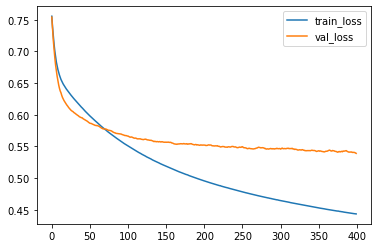

In [125]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

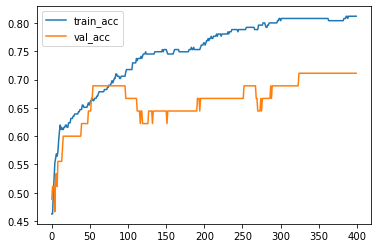

In [126]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

## Regularization
To apply regularization, we just need to modify the layer we added to the model. The argument is `kernel_regularizer`. We would like to set it to be `keras.regularizers.L2(alpha)`, where `alpha` is the regularization strength.

In [127]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))


Epoch 1/400
9/9 [==============================] - 0s 24ms/step - loss: 1.7429 - accuracy: 0.6196 - val_loss: 1.6190 - val_accuracy: 0.6667
Epoch 2/400
9/9 [==============================] - 0s 4ms/step - loss: 1.5532 - accuracy: 0.6196 - val_loss: 1.4517 - val_accuracy: 0.6444
Epoch 3/400
9/9 [==============================] - 0s 4ms/step - loss: 1.3966 - accuracy: 0.6157 - val_loss: 1.3158 - val_accuracy: 0.6444
Epoch 4/400
9/9 [==============================] - 0s 4ms/step - loss: 1.2700 - accuracy: 0.6157 - val_loss: 1.2030 - val_accuracy: 0.6444
Epoch 5/400
9/9 [==============================] - 0s 4ms/step - loss: 1.1651 - accuracy: 0.6157 - val_loss: 1.1098 - val_accuracy: 0.6444
Epoch 6/400
9/9 [==============================] - 0s 4ms/step - loss: 1.0785 - accuracy: 0.6157 - val_loss: 1.0326 - val_accuracy: 0.6444
Epoch 7/400
9/9 [==============================] - 0s 4ms/step - loss: 1.0069 - accuracy: 0.6157 - val_loss: 0.9688 - val_accuracy: 0.6444
Epoch 8/400
9/9 [=========

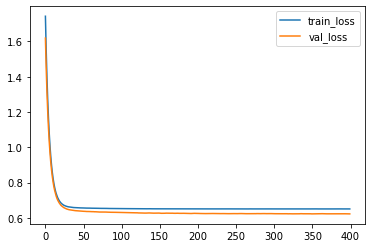

In [128]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

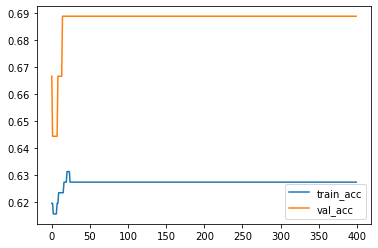

In [129]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

You may compare what we get here with the codes we get before.